        price price_clean
0  RM 340 000     340 000
1  RM 250 000     250 000
2  RM 230 000     230 000
3  RM 158 000     158 000
4  RM 305 000     305 000
5  RM 425 000     425 000
6  RM 230 000     230 000
7  RM 200 000     200 000
8  RM 275 000     275 000
9  RM 300 000     300 000


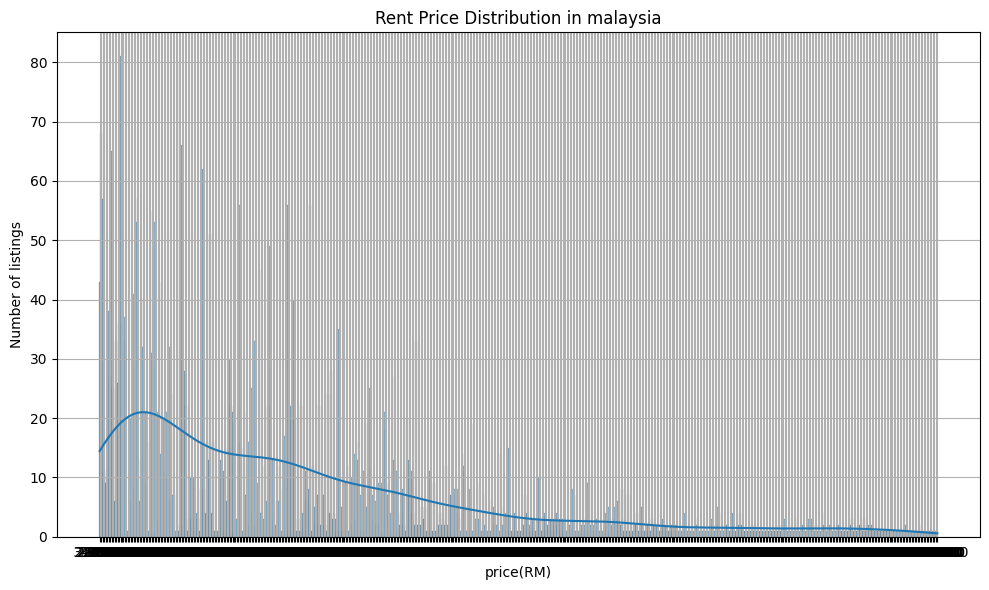

In [77]:
import pandas as pd
df = pd.read_csv(r"D:\Onediver\OneDrive\Desktop\rental_etl_project\Data\data_raw\houses.csv")
df['price_clean'] = df['price'].str.replace('RM', '').str.replace(',', '').str.replace('','')
print(df[['price','price_clean']].head(10))

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['price_clean'], bins=30, kde=True)
plt.title('Rent Price Distribution in malaysia')
plt.xlabel('price(RM)')
plt.ylabel('Number of listings')
plt.grid(True)
plt.tight_layout()
plt.show(block=True)
# 保存到项目路径的 Data 文件夹中
import os
os.makedirs("Data", exist_ok=True)
df.to_csv("Data/price_clean_cleaned.csv", index=False)


In [78]:
# data cleaning by whole column
print(df['Bedroom'].head(10))
print(df['Bedroom'].unique())
print('唯一值数量统计：')
print(df['Bedroom'].value_counts())
print(df['Bedroom'].value_counts(dropna=False).head(10))

0    4
1    3
2    3
3    3
4    1
5    3
6    3
7    3
8    3
9    3
Name: Bedroom, dtype: object
['4' '3' '1' '2' '5' '6' '-' '10' '8']
唯一值数量统计：
Bedroom
3     2926
2      472
4      362
1      180
5       48
6        8
10       2
-        1
8        1
Name: count, dtype: int64
Bedroom
3     2926
2      472
4      362
1      180
5       48
6        8
10       2
-        1
8        1
Name: count, dtype: int64


In [79]:
print(df['Bedroom'].value_counts(dropna=False).head(10))


Bedroom
3     2926
2      472
4      362
1      180
5       48
6        8
10       2
-        1
8        1
Name: count, dtype: int64


In [80]:
import numpy as np
def clean_bedroom(series):
    return series.replace('-',np.nan).astype(float)
df['Bedroom_clean'] = clean_bedroom(df['Bedroom'])
print(df[['Bedroom', 'Bedroom_clean']].head(10))

print(df['Bedroom_clean'].isnull().sum())
print("缺失数量为：", df['Bedroom_clean'].isnull().sum())
print("查看极端异常值:",df['Bedroom_clean'].max())
print(df['Bedroom_clean'].value_counts(dropna=False).head(10))

  Bedroom  Bedroom_clean
0       4            4.0
1       3            3.0
2       3            3.0
3       3            3.0
4       1            1.0
5       3            3.0
6       3            3.0
7       3            3.0
8       3            3.0
9       3            3.0
1
缺失数量为： 1
查看极端异常值: 10.0
Bedroom_clean
3.0     2926
2.0      472
4.0      362
1.0      180
5.0       48
6.0        8
10.0       2
NaN        1
8.0        1
Name: count, dtype: int64


In [81]:
from numpy import nan
def clean_bathroom(series):
    return series.replace('-', nan).astype(float)
df['Bathroom_clean'] = clean_bathroom(df['Bathroom'])
df['Bathroom_clean']=df['Bathroom_clean'].fillna(df['Bathroom_clean'].mode()[0])
df.to_csv("Data/Bathroom_clean.csv", index=False)


In [82]:
print(df['Bathroom_clean'].isnull().sum())
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending = False))


0
Highway                   96.475
Hospital                  91.425
Nearby Railway Station    90.925
Nearby Mall               90.875
Mall                      88.125
Railway Station           87.875
Nearby School             82.825
Bus Stop                  82.300
Park                      79.825
School                    76.300
REN Number                 5.075
Firm Number                5.075
Firm Type                  5.075
Bedroom_clean              0.025
dtype: float64


In [83]:
# 这里开始处理Property.size
print(df['Property Size'].value_counts(dropna=False).head(10))
print(df['Property Size'].dropna().unique()[:20])


Property Size
700 sq.ft.     201
850 sq.ft.     199
650 sq.ft.     153
800 sq.ft.     115
750 sq.ft.      90
1000 sq.ft.     81
1100 sq.ft.     79
900 sq.ft.      63
1200 sq.ft.     62
950 sq.ft.      54
Name: count, dtype: int64
['1000 sq.ft.' '980 sq.ft.' '592 sq.ft.' '467 sq.ft.' '1100 sq.ft.'
 '780 sq.ft.' '852 sq.ft.' '918 sq.ft.' '850 sq.ft.' '660 sq.ft.'
 '1246 sq.ft.' '550 sq.ft.' '1250 sq.ft.' '1048 sq.ft.' '1150 sq.ft.'
 '553 sq.ft.' '901 sq.ft.' '452 sq.ft.' '1016 sq.ft.' '900 sq.ft.']


In [84]:
df['property_size_clean'] = df['Property Size'].str.extract(r'(\d+(?:\.\d+)?)')
df['property_size_clean'] = pd.to_numeric(df['property_size_clean'], errors='coerce')
print(df['property_size_clean'].describe())
print("面积字段清洗完成：")
print(df['property_size_clean'].describe())
df.to_csv("Data/Property_clean.csv", index=False)

count      4000.000000
mean       1035.049000
std        2012.250439
min           1.000000
25%         750.000000
50%         900.000000
75%        1120.000000
max      122774.000000
Name: property_size_clean, dtype: float64
面积字段清洗完成：
count      4000.000000
mean       1035.049000
std        2012.250439
min           1.000000
25%         750.000000
50%         900.000000
75%        1120.000000
max      122774.000000
Name: property_size_clean, dtype: float64


In [85]:
# 保存函数
def save_cleaned(df,step_name):
    path = f"Data/data_cleaned_{step_name}.csv"
    df.to.csv(path,index=False)
    print(f"已经保存：{path}")

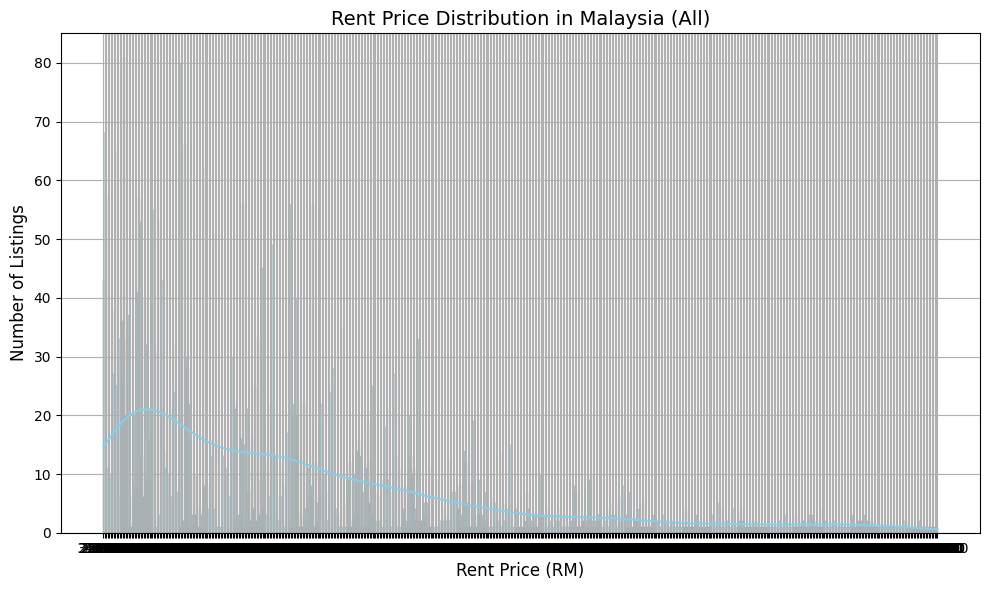

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_clean'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Rent Price Distribution in Malaysia (All)', fontsize=14)
plt.xlabel('Rent Price (RM)', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
